## Convective cells in the Himalaya region, example

In [2]:
import numpy as np 
from netCDF4 import Dataset 
import matplotlib.pyplot as plt
import cartopy
import matplotlib.colors as colors
# for elevation data 
from cartopy.io.srtm import SRTM3Source


In [18]:
file = '3B-HHR-E.MS.MRG.3IMERG.20100804-S033000-E035959.0210.V06B.HDF5.nc4'
file='3B-HHR-E.MS.MRG.3IMERG.20080720-S180000-E182959.1080.V06B.HDF5.nc4'
ds= Dataset(file)
precip= np.array(ds['precipitationCal'][0])
lons= np.array(ds['lon'])
lats=np.array(ds['lat'])
precip[precip < 0.1]= np.nan

In [4]:
elevation= 'elevation.nc'
ds= Dataset(elevation)
dem= np.array(ds['elevation'])
lats_dem = np.array(ds['latitude'])
lons_dem= np.array(ds['longitude'])

In [5]:
# read in cloud tops 
#ncep = 'merg_2008072018_4km-pixel.nc4'
#ds= Dataset(ncep)
#ctt= np.nanmean(np.array(ds['Tb']), axis = 0)
#ctt[ctt<100] = np.nan
#ctt[ctt > 300]= np.nan
#lons2= np.array(ds['lon'])
#lats2=np.array(ds['lat'])

## new domain: 
- lats: 15 - 50 N
- lons: 60 - 120 E

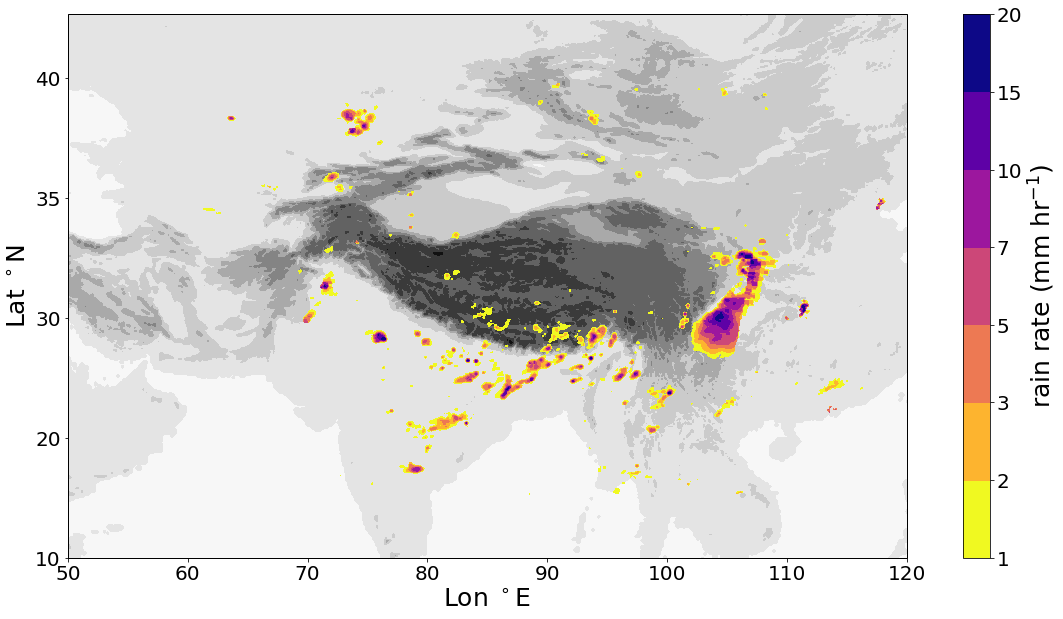

In [23]:
import cartopy.crs as ccrs

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([50,120 , 10, 50])

cmap = plt.cm.get_cmap('plasma_r')
bounds= np.array([1 , 2, 3, 5, 7, 10, 15, 20])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors= 256)

plt.contourf(lons_dem, lats_dem, dem, transform= ccrs.PlateCarree(), cmap= 'Greys')
plt.contourf(lons, lats, precip.T,bounds , transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

xlabels=[ 50, 60,70, 80, 90, 100, 110, 120]
ylabels= [ 10, 20, 30, 35, 40, 50]
plt.xticks([ 50, 60, 70, 80,90, 100, 110, 120], xlabels, fontsize=20)
plt.yticks([10, 20,30, 40, 50],ylabels, fontsize=20)
plt.xlabel('Lon $^\circ$E',  fontsize=25)
plt.ylabel('Lat $^\circ$N',  fontsize=25)

cbar = plt.colorbar(extend = 'max')
cbar.set_label('rain rate (mm hr$^{-1}$)', fontsize= 25)
cbar.set_ticks(bounds)
labels = ['1', '2', '3', '5', '7', '10', '15', '20']
cbar.set_ticklabels(labels)
plt.rcParams['font.size']=20

plt.savefig('convective_cell_20080720.png')
plt.show()

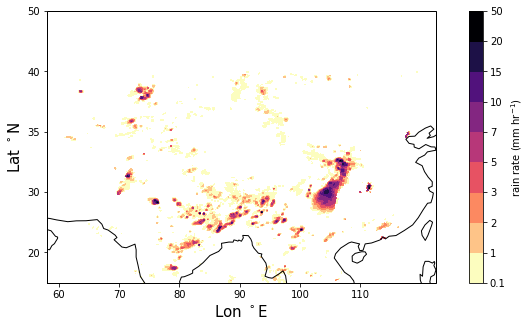

In [7]:


plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.PlateCarree())

cmap = plt.cm.get_cmap('magma_r')
bounds= np.array([0.1, 1 , 2, 3, 5, 7, 10, 15, 20, 50])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors= 256)


cmap.set_bad(color='white')

m = plt.contourf(lons, lats, precip.T,bounds , transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

xlabels=[60,70, 80, 90, 100, 110]
ylabels= [ 20, 30, 35, 40, 50,60]
plt.xticks([60, 70, 80,90, 100, 110], xlabels, fontsize=10)
plt.yticks([20,30, 40, 50, 60],ylabels, fontsize=10)
plt.xlabel('Lon $^\circ$E',  fontsize=15)
plt.ylabel('Lat $^\circ$N',  fontsize=15)

cbar = plt.colorbar(extend = 'both')
cbar.set_label('rain rate (mm hr$^{-1}$)', fontsize= 10)
cbar.set_ticks(bounds)
labels = ['0.1','1', '2', '3', '5', '7', '10', '15', '20', '50']
cbar.set_ticklabels(labels)

ax.coastlines()

plt.savefig('example_convective_cell_himalayas.png')
plt.show()